<a href="https://colab.research.google.com/github/rajatpal00/-ABTN0104--IPL-T20-Cricket-Analysis-/blob/main/Rajat_Kr_Pal_24_02_2021_%5BABTN0104%5D_IPL_T20_Cricket_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Indian Premier League(IPL) is a professional Twenty20 cricket league in India contested during March or April and May of every year by eight teams representing eight different cities in India. The league was founded by the Board of Control for Cricket in India(BCCI) in 2008. </b>

## <b> Explore and analyze the data to discover results and statistics for different teams playing in IPL. </b>

The IPL is the most-attended cricket league in the world and in 2014 was ranked sixth by average attendance among all sports leagues. In 2010, the IPL became the first sporting event in the world to be broadcast live on YouTube. The brand value of the IPL in 2019 was ₹475 billion  to the GDP of the Indian economy.

On 13 September 2007, the BCCI announced the launch of a franchise-based Twenty20 cricket competition called Indian Premier League whose first season was slated to start in April 2008, in a "high-profile ceremony" in New Delhi. BCCI vice-president Lalit Modi, said to be the mastermind behind the idea of the IPL, spelled out the details of the tournament including its format, the prize money, franchise revenue system and squad composition rules. It was also revealed that the IPL would be run by a seven-man governing council composed of former India players and BCCI officials and that the top two teams of the IPL would qualify for that year's Champions League Twenty20. Modi also clarified that they had been working on the idea for two years and that the IPL was not started as a "knee-jerk reaction" to the ICL. The league's format was similar to that of the Premier League of England and the NBA in the United States.

In order to decide the owners for the new league, an auction was held on 24 January 2008 with the total base prices of the franchises costing around      4 million. At the end of the auction, the winning bidders were announced, as well as the cities the teams would be based in:  Hyderabad, Jaipur, KolkatMumbai. In the end, the franchises  were all sold for a total of  $723.59 million. The Indian Cricket League soon folded in 2008. (Scource - https://en.wikipedia.org/wiki/Indian_Premier_League)

Lets start this project by exploring the Data and extracting the usefull information from the dataset which we have 

lets us import the data in the colabnotebook first

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize']= (20,10)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


This is deliveries data set which give as information about each bowl which have been bowled in ipl so far in IPL,


In [3]:
path = '/content/drive/MyDrive/AlmaBetter/capstone project/[ABTN0104] IPL T20 CRICKET/IPL DATA/'
deliveries_df = pd.read_csv(path + "deliveries.csv")

In [4]:
deliveries_df.head(3)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN


In [5]:
# by this we try to find out the sanity of the data set.
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

while exploring the data by using info function we cab say the most of the columns are present with values but there are few columns like player_dismissed which have some values in that

**Lets see what information does matches data frame holds** 

In [6]:
matches_df = pd.read_csv(path + "matches.csv")
matches_df.head(5)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [7]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

While exploring matches Dataframe we came across that there are 4 null values for column winner, player _of_match


 Lets see what is reason for that

In [8]:
# we are looking for all row values in winner column which have null value
matches_df[matches_df["winner"].isna()]



,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,IPL-2011,Delhi,21-05-2011,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,IPL-2015,Bangalore,29-04-2015,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,IPL-2015,Bangalore,17-05-2015,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
744,11340,IPL-2019,Bengaluru,30-04-2019,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


so from this we can conclude that on these day the match has no result that could be possible due to rain or any other failure.

**Now we will finding out the team which have won max number of matches in ipl so far**

In [9]:
# this can we found by using value_counts function on winner column
# converting the pandaserise into dataframe for better representation 
team_by_win = pd.DataFrame(matches_df['winner'].value_counts())

#lets reset the index
team_by_win.reset_index(inplace= True)
team_by_win.rename(columns ={"index":"Team Name","winner":"matches_Won"},inplace =True)


# tried to set the background color on the basis of numerical value present by using background _gradient 
team_by_win.style.background_gradient(cmap="PuBu")

,Team Name,matches_Won
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
5,Rajasthan Royals,75
6,Delhi Daredevils,67
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Gujarat Lions,13


From this data we can conclude that  mumbai indian is the team which have won max number of matches

By looking this Dataframe any one can thinks  that there are 14 teams in IPL


But that is not correct as there are few teams which have rename them self 

*   Delhi Daredevils becomes  Delhi Capitals
*   Deccan Chargers become  Sunrisers Hyderabad

And few teams have played for only one or two season



*   Gujarat Lions
*	  Pune Warriors

*   Rising Pune Supergiant
*   Kochi Tuskers Kerala













**Do u want to know which Team have got maximun number of orange cap holder**

In [10]:
#let us start by making a neww dataframe with only two columns of matches dataframe which can be merged with deliveries data frame  
new_match_df = matches_df[["id",'Season']]
new_match_df

,id,Season
0,1,IPL-2017
1,2,IPL-2017
2,3,IPL-2017
3,4,IPL-2017
4,5,IPL-2017
...,...,...
751,11347,IPL-2019
752,11412,IPL-2019
753,11413,IPL-2019
754,11414,IPL-2019


In [11]:
#using merge operation  on the match id columns of deliveries dataframe and id column of new_matches_df dataframe
new_deliveries_df = pd.merge(deliveries_df,new_match_df , left_on= "match_id",right_on ="id")

In [12]:
new_deliveries_df

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,id,Season
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,IPL-2017
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,IPL-2017
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,1,IPL-2017
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,IPL-2017
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN,1,IPL-2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,11415,IPL-2019
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN,11415,IPL-2019
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya,11415,IPL-2019
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN,11415,IPL-2019


In [13]:
new_deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179078 entries, 0 to 179077
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

Now we can use group by function get deliveries bowled in each ipl season

In [14]:
ipl_season = new_deliveries_df.groupby("Season")

Lets make a Function which takes ipl season as argument and return orange cap holder of that Seasonr

In [15]:
def get_orange_cap(season):
  season = season.upper()
  s= ipl_season.get_group(season)
  max_runs = s.groupby(["batsman"])["batsman_runs"].sum().sort_values(ascending =False).reset_index()
  # print(max_runs)
  # print(s)
  top_scores= max_runs.loc[0,"batsman"]
  runs = max_runs.loc[0,"batsman_runs"]
  team_name = s[s["batsman"]==top_scores]["batting_team"][0]
  print(team_name)
  

In [16]:
get_orange_cap("IPL-2017")

Sunrisers Hyderabad


We can also find the top scorer in each season by using group by function


In [17]:
# lets make a empty list which will be helpfull in making dataframe
orange_cap =[]

# Group by objects can be itaterd to get the datframe of each groupby

for season ,season_df in ipl_season:
  # season represent the name by which of group by has been done
  # season_df will give dataframe object with respect to that name

  # we are again performing group by on the season dataframe to group this datframe with batsman 
  max_runs = season_df.groupby(["batsman"])["batsman_runs"].sum().sort_values(ascending =False).reset_index()
  # print(season)
  print(max_runs)
  
  # find the top scorer from the recent created datframe
  top_scores= max_runs.loc[0,"batsman"]

  # sruns scored by that batsman
  runs = max_runs.loc[0,"batsman_runs"]

  # we also found the team which he belongs to
  team_name = season_df[season_df["batsman"]==top_scores]["batting_team"].iloc[0]
  # print(team_name)

  # then we store all this data in dictionary
  dict_ ={"season":season,"Team":team_name,"Batsman":top_scores,"Runs":runs}

  # now we append this dictinary in the list
  orange_cap.append(dict_)
    # now oarnge cap list conatain dictinaries



            batsman  batsman_runs
0          SE Marsh           616
1         G Gambhir           534
2     ST Jayasuriya           514
3         SR Watson           472
4          GC Smith           441
..              ...           ...
149     S Sreesanth             0
150  M Muralitharan             0
151          U Kaul             0
152        L Balaji             0
153        MM Patel             0

[154 rows x 2 columns]
            batsman  batsman_runs
0         ML Hayden           572
1      AC Gilchrist           495
2    AB de Villiers           465
3          SK Raina           434
4        TM Dilshan           418
..              ...           ...
145      BAW Mendis             0
146      KP Appanna             0
147         C Nanda             0
148   TM Srivastava             0
149        L Ronchi             0

[150 rows x 2 columns]
           batsman  batsman_runs
0     SR Tendulkar           618
1        JH Kallis           572
2         SK Raina           528
3   

**Now we have created a dataframe  with the us eof list, which contain highest run getter from all season**

In [18]:
# makinhg dataframe from list
orange_cap_df = pd.DataFrame(orange_cap)

# using background gradient to color on basis of highest values 
orange_cap_df.style.background_gradient(cmap="Blues")

,season,Team,Batsman,Runs
0,IPL-2008,Kings XI Punjab,SE Marsh,616
1,IPL-2009,Chennai Super Kings,ML Hayden,572
2,IPL-2010,Mumbai Indians,SR Tendulkar,618
3,IPL-2011,Royal Challengers Bangalore,CH Gayle,608
4,IPL-2012,Royal Challengers Bangalore,CH Gayle,733
5,IPL-2013,Chennai Super Kings,MEK Hussey,733
6,IPL-2014,Kolkata Knight Riders,RV Uthappa,660
7,IPL-2015,Sunrisers Hyderabad,DA Warner,562
8,IPL-2016,Royal Challengers Bangalore,V Kohli,973
9,IPL-2017,Sunrisers Hyderabad,DA Warner,641


**Now by ploting the scatter gragh we can see which team has maximum orange cap holder**

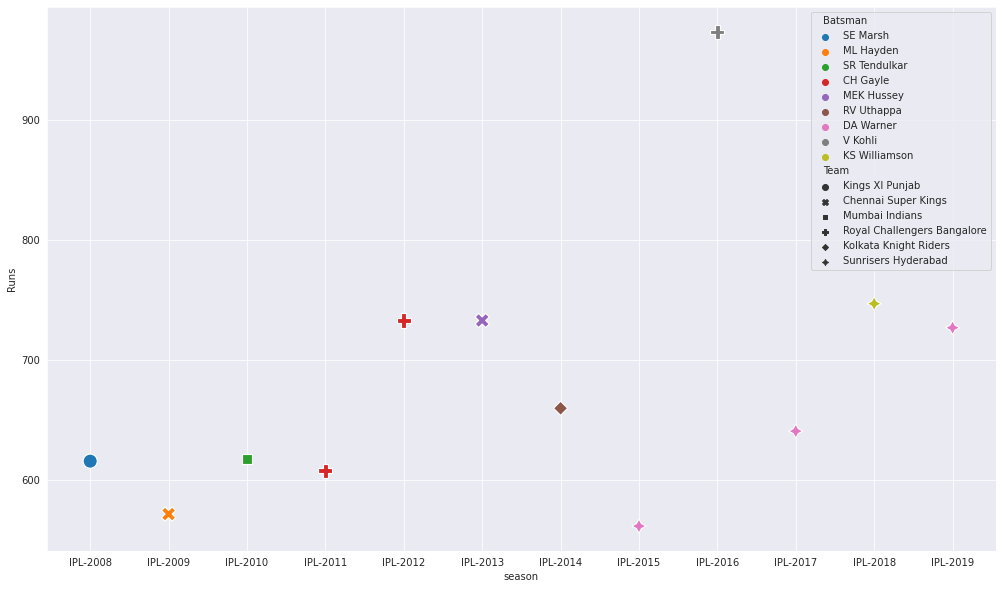

In [34]:
# use rcParam to fix the size of the plot
plt.rcParams['figure.figsize']= (17,10)
sns.set_style("darkgrid")

# used scattered plot to plot to plot the data with the use of hue and style
sns.scatterplot(data=orange_cap_df,x="season",y="Runs",hue ="Batsman",s=200,style="Team")



*ohhh by looking in the graph we can see that Sunriser Hyderabad is consistently  having the highest scorer in their team from last 3 IPL season*

**Lets explore this data more  and find out how overs play a crucial role in T20**

In [20]:
#creating a function which will return a flaot value of wicket which can be usefull for us
def get_wicket(dismisal):
  if dismisal  :
    return 1
 


In [21]:
deliveries_df["wicket"] = deliveries_df[~deliveries_df['player_dismissed'].isna()]["player_dismissed"].apply(get_wicket)
deliveries_df[~deliveries_df["wicket"].isna()].head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,wicket
11,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,5,DA Warner,S Dhawan,A Choudhary,0,0,0,0,0,0,0,0,0,DA Warner,caught,Mandeep Singh,1.0
64,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,11,3,S Dhawan,MC Henriques,STR Binny,0,0,0,0,0,0,0,0,0,S Dhawan,caught,Sachin Baby,1.0


In [22]:
# we are going to remove the data of superover as we are more focused on matches overs

deliveries_df[deliveries_df['is_super_over']!=0].tail(2)
# by exploring we find out it will have only one over which is bowled that will create wrong information about the data

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,wicket
127368,536,4,Rajasthan Royals,Kings XI Punjab,1,3,SPD Smith,JP Faulkner,MG Johnson,1,0,0,0,0,0,1,0,1,NaN,NaN,NaN,NaN
127369,536,4,Rajasthan Royals,Kings XI Punjab,1,4,JP Faulkner,SPD Smith,MG Johnson,1,0,0,0,0,0,0,0,0,JP Faulkner,run out,NaN,1.0


In [23]:
wicketper_over_df = deliveries_df[deliveries_df["is_super_over"]==0].groupby("over").sum('wickets').reset_index()
wicketper_over_df

,over,match_id,inning,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,wicket
0,1,17086968,14317,34974,0,537,51,245,28,0,8372,861,9233,292.0
1,2,16735202,14248,34880,0,489,40,262,32,0,10139,823,10962,350.0
2,3,16764234,14122,34273,0,392,42,231,40,0,11413,705,12118,371.0
3,4,16678664,14062,34004,0,340,22,230,46,0,11769,638,12407,385.0
4,5,16621283,13997,33794,0,322,32,177,34,5,11856,570,12426,385.0
5,6,16492607,13966,33754,0,332,41,227,47,0,11865,647,12512,380.0
6,7,16450119,13895,33525,0,362,22,200,23,0,9476,607,10083,308.0
7,8,16434386,13858,33317,0,300,22,173,27,0,10215,522,10737,324.0
8,9,16431313,13814,33289,0,295,44,172,20,0,10596,531,11127,369.0
9,10,16480392,13728,32966,0,269,57,153,24,0,10484,503,10987,338.0


Lets create some sub plots 

Text(0.5, 1.0, 'No of wicket taken in each over in IPL')

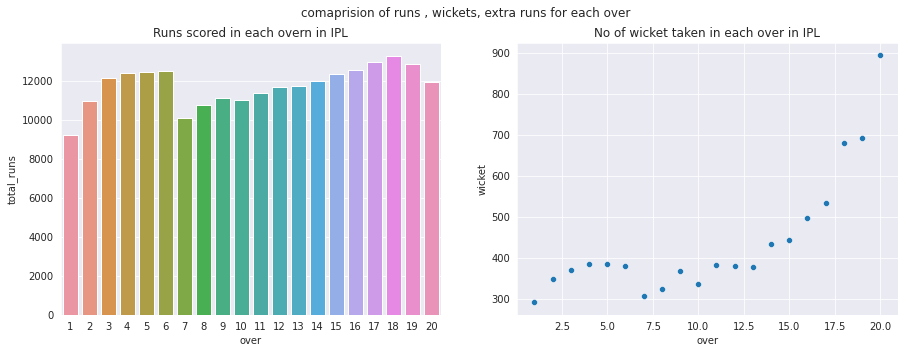

In [24]:
sns.set_style("darkgrid")
fig , axes= plt.subplots(1,2, figsize = (15,5))
fig.suptitle ('comaprision of runs , wickets, extra runs for each over')

sns.barplot(ax= axes[0],data = wicketper_over_df,x='over',y="total_runs").set_title("Runs scored in each overn in IPL")
sns.scatterplot(ax= axes[1],data= wicketper_over_df,x="over",y="wicket").set_title("No of wicket taken in each over in IPL")



By looking at these graphs we can conclude that team tries to score maximum runs in last over of the match and in that process they even losses there wicket.

**Lets have a look at extra runs in IPL so far**

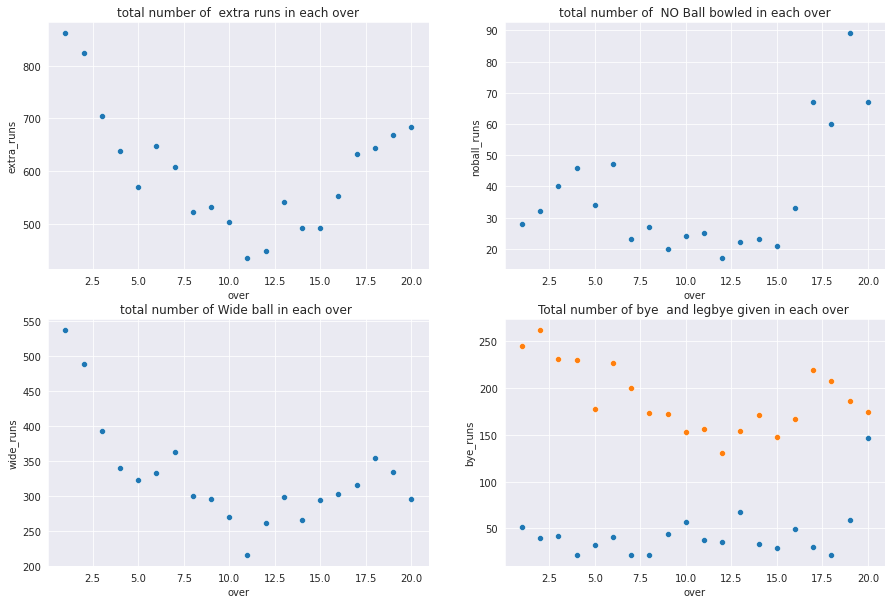

In [25]:
sns.set_style("darkgrid")
fig ,axes= plt.subplots(2,2 ,figsize= (15,10))


sns.scatterplot(ax=axes[0,0],data = wicketper_over_df,x="over",y="extra_runs",legend="auto").set_title("total number of  extra runs in each over")
sns.scatterplot(ax =axes[0,1],data = wicketper_over_df,x="over",y= "noball_runs",legend="full").set_title("total number of  NO Ball bowled in each over")
sns.scatterplot(ax= axes[1,0],data = wicketper_over_df,x="over",y="wide_runs").set_title("total number of Wide ball in each over ")
sns.scatterplot(ax = axes[1,1],data = wicketper_over_df,x="over",y="bye_runs").set_title("Total number of bye  and legbye given in each over ")
sns.scatterplot(ax= axes[1,1], data = wicketper_over_df,x="over",y ="legbye_runs",legend= "full")
# 
# sns.scatterplot("over","batsman_runs", data = wicketper_over_df)

*its clearly visible in the graphs in first sub plot that bowler have given more extra in initial stage of the the match when at the end* 

One more thing which we can see from these graphs is the major contributor to exta runs are wide balls and leg byes

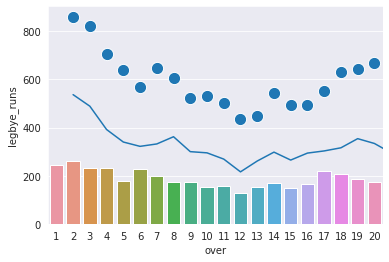

In [26]:
sns.scatterplot(data=wicketper_over_df,x="over",y='extra_runs',s=150)
sns.lineplot(data=wicketper_over_df,x="over",y='wide_runs', )
sns.barplot(data=wicketper_over_df,x="over",y='legbye_runs')


In [27]:
index=np.arange(0,179078)

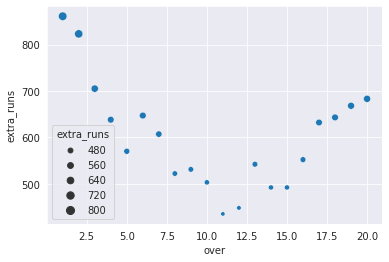

In [28]:
sns.scatterplot(data= wicketper_over_df,x="over",y="extra_runs",size='extra_runs',legend ="auto")

In [29]:
 m=matches_df.groupby("Season")

In [30]:
m.get_group("IPL-2016")

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
576,577,IPL-2016,Mumbai,09-04-2016,Mumbai Indians,Rising Pune Supergiants,Mumbai Indians,bat,normal,0,Rising Pune Supergiants,0,9,AM Rahane,Wankhede Stadium,HDPK Dharmasena,CK Nandan,NaN
577,578,IPL-2016,Kolkata,10-04-2016,Delhi Daredevils,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,9,AD Russell,Eden Gardens,S Ravi,C Shamshuddin,NaN
578,579,IPL-2016,Chandigarh,11-04-2016,Kings XI Punjab,Gujarat Lions,Gujarat Lions,field,normal,0,Gujarat Lions,0,5,AJ Finch,"Punjab Cricket Association IS Bindra Stadium, ...",AK Chaudhary,VA Kulkarni,NaN
579,580,IPL-2016,Bangalore,12-04-2016,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Royal Challengers Bangalore,45,0,AB de Villiers,M Chinnaswamy Stadium,HDPK Dharmasena,VK Sharma,NaN
580,581,IPL-2016,Kolkata,13-04-2016,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,6,RG Sharma,Eden Gardens,Nitin Menon,S Ravi,NaN
581,582,IPL-2016,Rajkot,14-04-2016,Rising Pune Supergiants,Gujarat Lions,Rising Pune Supergiants,bat,normal,0,Gujarat Lions,0,7,AJ Finch,Saurashtra Cricket Association Stadium,VA Kulkarni,CK Nandan,NaN
582,583,IPL-2016,Delhi,15-04-2016,Kings XI Punjab,Delhi Daredevils,Delhi Daredevils,field,normal,0,Delhi Daredevils,0,8,A Mishra,Feroz Shah Kotla,S Ravi,C Shamshuddin,NaN
583,584,IPL-2016,Hyderabad,16-04-2016,Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,normal,0,Kolkata Knight Riders,0,8,G Gambhir,"Rajiv Gandhi International Stadium, Uppal",AK Chaudhary,CK Nandan,NaN
584,585,IPL-2016,Mumbai,16-04-2016,Mumbai Indians,Gujarat Lions,Gujarat Lions,field,normal,0,Gujarat Lions,0,3,AJ Finch,Wankhede Stadium,HDPK Dharmasena,VK Sharma,NaN
585,586,IPL-2016,Chandigarh,17-04-2016,Rising Pune Supergiants,Kings XI Punjab,Rising Pune Supergiants,bat,normal,0,Kings XI Punjab,0,6,M Vohra,"Punjab Cricket Association IS Bindra Stadium, ...",S Ravi,C Shamshuddin,NaN


Lets find out the team which have won the maxium matches so far